In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [2]:
# Due to a large volume of data and limited space on memory disk, using dask is a solution to reduce the size of dataset.
import dask.dataframe as dd

# Read the CSV file with Dask
df=dd.read_csv(r'G:\GitHub\Kaggle Tokyo Stock Exchange\jpx-tokyo-stock-exchange-prediction\train_files\stock_prices.csv')

# Convert the Date column
df['Date'] = df['Date'].astype('M8[ns]')  # This is the datetime dtype in Dask

# Compute if necessary
df = df.compute()


In [3]:
df.head(10)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
5,20170104_1379,2017-01-04,1379,2105.0,2147.0,2101.0,2143.0,77300,1.0,NaN,False,0.005169
6,20170104_1381,2017-01-04,1381,1950.0,1960.0,1949.0,1960.0,1300,1.0,NaN,False,-0.009326
7,20170104_1407,2017-01-04,1407,857.0,877.0,851.0,866.0,147000,1.0,NaN,False,-0.003437
8,20170104_1414,2017-01-04,1414,4940.0,5060.0,4935.0,5050.0,119600,1.0,NaN,False,0.000000
9,20170104_1417,2017-01-04,1417,1051.0,1063.0,1048.0,1053.0,347500,1.0,NaN,False,-0.007463


## Stock statistics

Let have a look at stock perfomance of 3 famous Japanese companies in electric appliances Sector: Panasonic, Sharp and Mitsubishi.

In [4]:
Pana = df[df['SecuritiesCode']==6752]
Pana.index = Pana.pop('Date')
Pana

,RowId,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
Date,,,,,,,,,,,
2017-01-04,20170104_6752,6752,1213.0,1223.0,1210.0,1217.0,8892100,1.0,NaN,False,-0.005332
2017-01-05,20170105_6752,6752,1227.0,1237.5,1213.5,1219.0,9136100,1.0,NaN,False,-0.012371
2017-01-06,20170106_6752,6752,1216.0,1216.5,1205.5,1212.5,7740700,1.0,NaN,False,0.011691
2017-01-10,20170110_6752,6752,1210.0,1211.0,1197.5,1197.5,9803900,1.0,NaN,False,0.002064
2017-01-11,20170111_6752,6752,1213.0,1216.0,1204.5,1211.5,8906900,1.0,NaN,False,0.000824
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,20211129_6752,6752,1278.0,1295.5,1268.0,1273.0,8041200,1.0,NaN,False,0.001207
2021-11-30,20211130_6752,6752,1280.0,1285.5,1233.0,1242.5,15389900,1.0,NaN,False,-0.004019
2021-12-01,20211201_6752,6752,1236.0,1252.0,1233.0,1244.0,7528000,1.0,NaN,False,0.012510


In [5]:
Sharp = df[df['SecuritiesCode']==6753]
Sharp.index = Sharp.pop('Date')
Sharp

,RowId,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
Date,,,,,,,,,,,
2017-01-04,20170104_6753,6753,282.0,298.0,281.0,293.0,91198000,1.0,NaN,False,-0.027692
2017-01-05,20170105_6753,6753,299.0,326.0,297.0,325.0,151633000,1.0,NaN,False,0.022152
2017-01-06,20170106_6753,6753,326.0,348.0,315.0,316.0,187385000,1.0,NaN,False,-0.009288
2017-01-10,20170110_6753,6753,326.0,329.0,310.0,323.0,64817000,1.0,NaN,False,-0.015625
2017-01-11,20170111_6753,6753,320.0,325.0,318.0,320.0,36799000,1.0,NaN,False,-0.019048
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,20211129_6753,6753,1291.0,1318.0,1285.0,1301.0,2498400,1.0,NaN,False,-0.003937
2021-11-30,20211130_6753,6753,1304.0,1312.0,1265.0,1270.0,3752800,1.0,NaN,False,-0.001581
2021-12-01,20211201_6753,6753,1265.0,1278.0,1251.0,1265.0,2204200,1.0,NaN,False,0.007126


In [6]:
Mit = df[df['SecuritiesCode']==6503]
Mit.index = Mit.pop('Date')
Mit

,RowId,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
Date,,,,,,,,,,,
2017-01-04,20170104_6503,6503,1639.5,1666.5,1637.5,1664.5,6590500,1.0,NaN,False,0.002739
2017-01-05,20170105_6503,6503,1662.0,1662.5,1638.5,1643.0,5614100,1.0,NaN,False,-0.010926
2017-01-06,20170106_6503,6503,1626.5,1653.0,1623.0,1647.5,5078900,1.0,NaN,False,0.001841
2017-01-10,20170110_6503,6503,1643.0,1656.0,1628.0,1629.5,5628800,1.0,NaN,False,0.007963
2017-01-11,20170111_6503,6503,1630.0,1638.0,1618.5,1632.5,7295700,1.0,NaN,False,0.000608
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,20211129_6503,6503,1459.0,1484.0,1451.5,1453.0,5819000,1.0,NaN,False,0.005616
2021-11-30,20211130_6503,6503,1460.5,1469.5,1418.0,1424.5,15360300,1.0,NaN,False,-0.005236
2021-12-01,20211201_6503,6503,1433.0,1452.0,1426.5,1432.5,8868000,1.0,NaN,False,0.015439


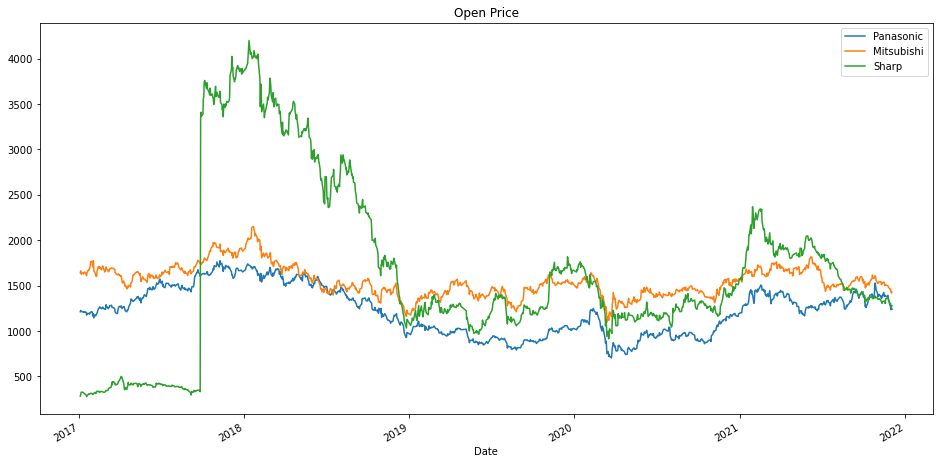

In [7]:
Pana['Open'].plot(label='Panasonic',figsize=(16,8),title='Open Price')
Mit['Open'].plot(label='Mitsubishi')
Sharp['Open'].plot(label='Sharp')
plt.legend()

Sharp price hitch jumped over to almost 10 times at the end of 2017 and outweighted the other two stocks in 2018 before reaching a more stable range (1000-2500 Jpy) until 2022. It can be seen that Sharp stock is more volatile than the other two.  

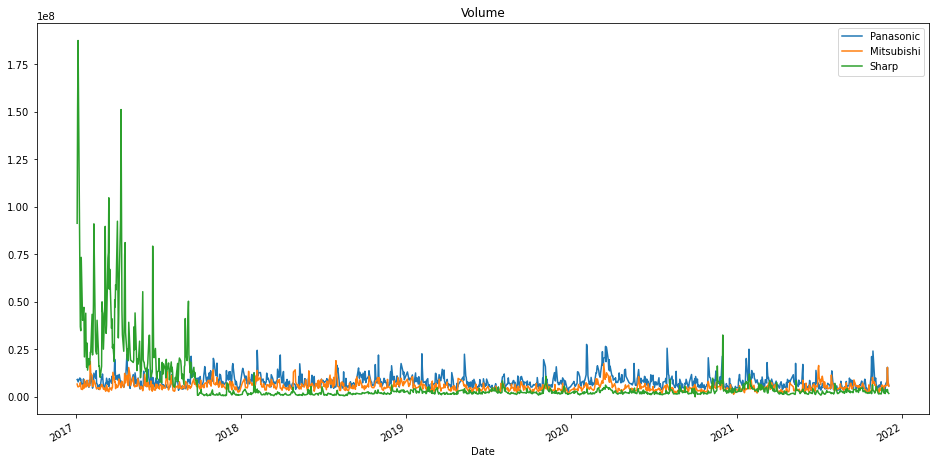

In [8]:
Pana['Volume'].plot(label='Panasonic',figsize=(16,8),title='Volume')
Mit['Volume'].plot(label='Mitsubishi')
Sharp['Volume'].plot(label='Sharp')
plt.legend()

#### 

C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

Text(0, 0.5, 'Total Traded')

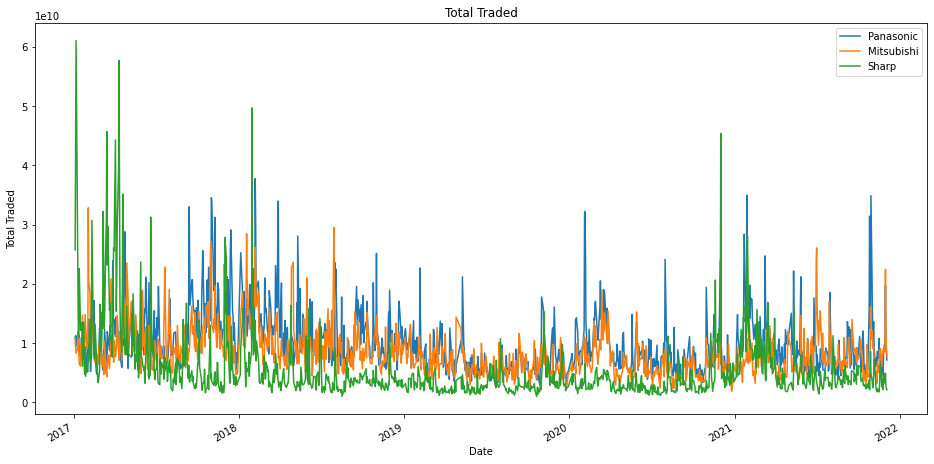

In [9]:
# Total traded
Pana['Total Traded'] = Pana['Volume']*Pana['Open']
Mit['Total Traded'] = Mit['Volume']*Mit['Open']
Sharp['Total Traded'] = Sharp['Volume']*Sharp['Open']

Pana['Total Traded'].plot(label='Panasonic',figsize=(16,8), title = "Total Traded")
Mit['Total Traded'].plot(label='Mitsubishi')
Sharp['Total Traded'].plot(label='Sharp')
plt.legend()
plt.ylabel('Total Traded')

In [10]:
# Max traded days

Max_P = Pana.index[Pana['Total Traded'].argmax()]
Max_M = Mit.index[Mit['Total Traded'].argmax()]
Max_S = Sharp.index[Sharp['Total Traded'].argmax()]

print('Highest values traded day of Panasonic: ', Max_P)
print('Highest values traded day of Mitsubishi: ', Max_M)
print('Highest values traded day of Sharp: ', Max_S)

Highest values traded day of Panasonic:  2018-02-06 00:00:00
Highest values traded day of Mitsubishi:  2017-02-02 00:00:00
Highest values traded day of Sharp:  2017-01-06 00:00:00


### Moving Average Return

C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Moving Average Mean - Panasonic'}, xlabel='Date'>

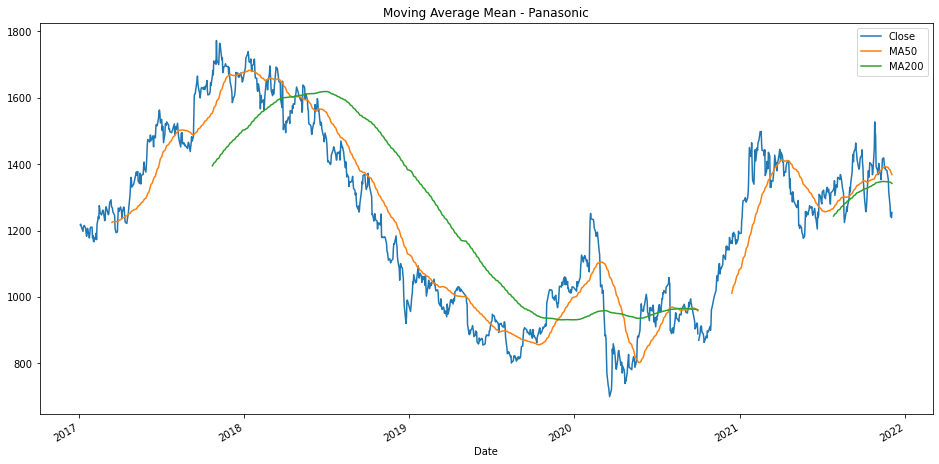

In [11]:
Pana['MA50'] = Pana['Close'].rolling(50).mean()
Pana['MA200'] = Pana['Close'].rolling(200).mean()
Pana[['Close','MA50','MA200']].plot(label='Panasonic',figsize=(16,8), title="Moving Average Mean - Panasonic")

C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:title={'center':'Moving Average Mean - Mitsubishi'}, xlabel='Date'>

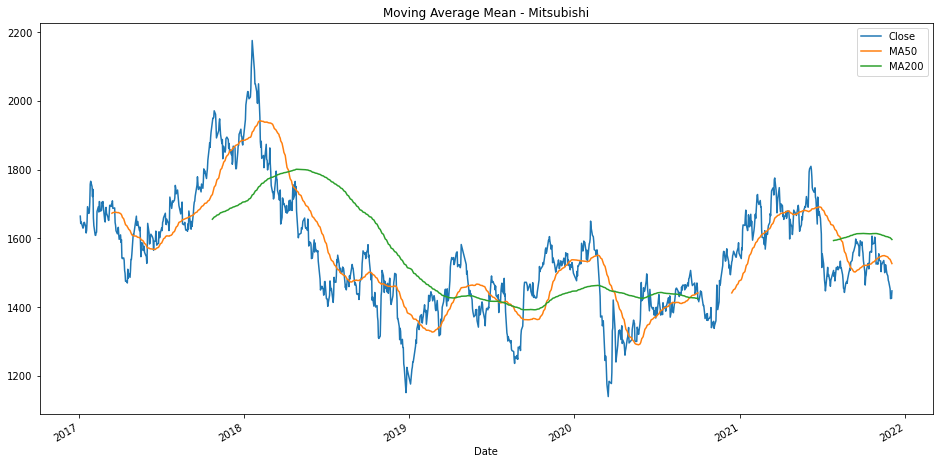

In [12]:
Mit['MA50'] = Mit['Close'].rolling(50).mean()
Mit['MA200'] = Mit['Close'].rolling(200).mean()
Mit[['Close','MA50','MA200']].plot(label='Mitsubishi',figsize=(16,8), title="Moving Average Mean - Mitsubishi")

C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


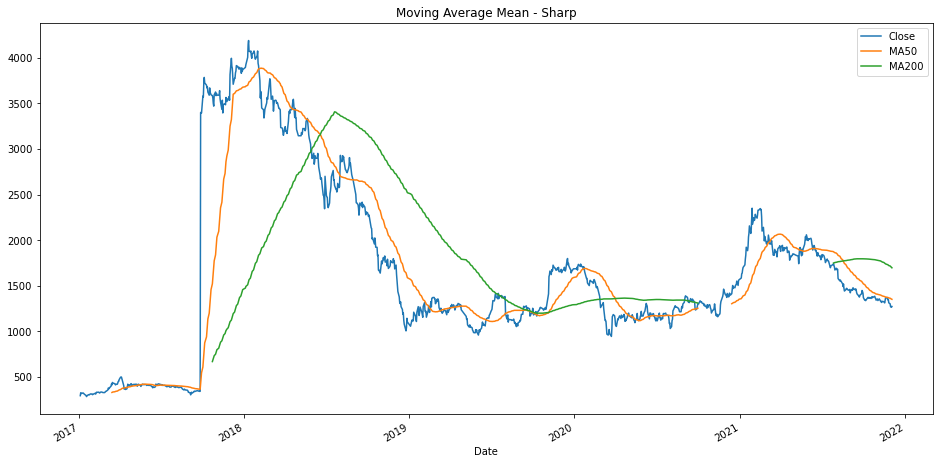

In [13]:
Sharp['MA50'] = Sharp['Close'].rolling(50).mean()
Sharp['MA200'] = Sharp['Close'].rolling(200).mean()
Sharp[['Close','MA50','MA200']].plot(label='Sharp',figsize=(16,8), title="Moving Average Mean - Sharp");

### Correlation

In [14]:
from pandas.plotting import scatter_matrix
df_com = pd.concat([Pana['Close'], Mit['Close'], Sharp['Close']],axis=1)
df_com.columns = ['Pana Close','Mit Close','Sharp Close']

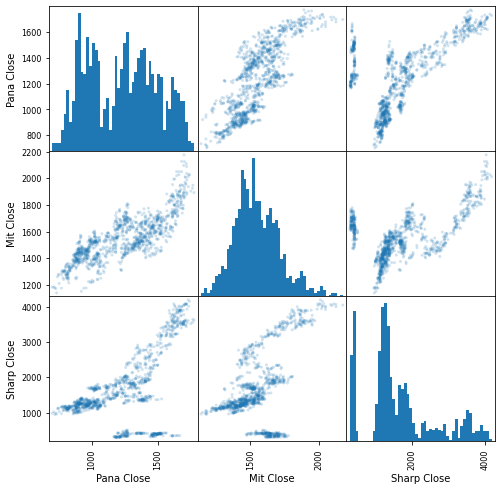

In [15]:
scatter_matrix(df_com,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the electric appliance industry. There seems to be a positive relationship between these stocks.

#### Let's plot out the stock price of the latest month in the dataset using candle stick chart

In [16]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, WeekdayLocator, DayLocator, DateFormatter, MONDAY
import mplfinance as mpf
import pandas as pd

def Candlestick(df, Title):
    # Reset the index to get a column of November-21 Dates
    df_reset = df.loc['2021-11':'2021-12'].reset_index()

    # Convert the 'Date' column to datetime
    df_reset['Date'] = pd.to_datetime(df_reset['Date'])
    df_reset.set_index('Date', inplace=True)

    # Create a new column of numerical "date" values for matplotlib to use
    df_reset['date_ax'] = df_reset.index.map(date2num)
    df_values = [tuple(vals) for vals in df_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    weekFormatter = DateFormatter('%b %d')  # e.g., Nov 12
    dayFormatter = DateFormatter('%d')      # e.g., 12

    # Plot it
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)

    mpf.plot(df_reset, ax=ax, type='candle', style='yahoo', ylabel='Price')

    # Set the title explicitly
    ax.set_title(Title)

    plt.show()


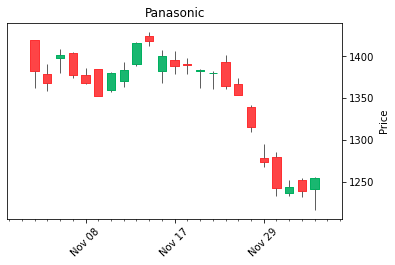

In [17]:
Candlestick(Pana, 'Panasonic')

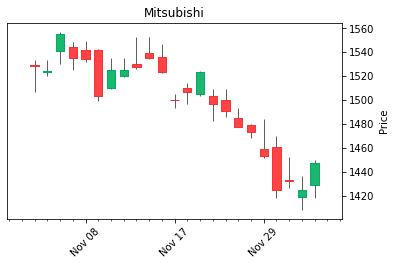

In [18]:
Candlestick(Mit,'Mitsubishi')

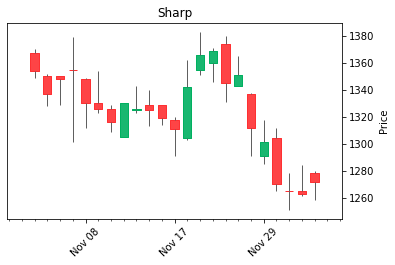

In [19]:
Candlestick(Sharp, 'Sharp')

## Basic financial analysis

### Daily return

In [20]:
Pana['Return'] = Pana['Close']/Pana['Close'].shift(1)-1
Mit['Return'] = Mit['Close']/Mit['Close'].shift(1) -1
Sharp['Return'] = Sharp['Close']/Sharp['Close'].shift(1) -1

Pana['Return']
Mit['Return']
Sharp['Return']

C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Date
2017-01-04         NaN
2017-01-05    0.109215
2017-01-06   -0.027692
2017-01-10    0.022152
2017-01-11   -0.009288
                ...   
2021-11-29   -0.008384
2021-11-30   -0.023828
2021-12-01   -0.003937
2021-12-02   -0.001581
2021-12-03    0.007126
Name: Return, Length: 1202, dtype: float64

<AxesSubplot:>

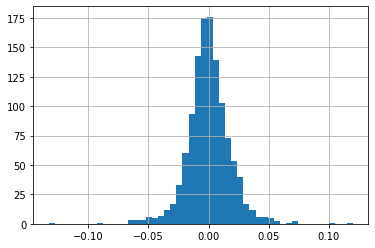

In [21]:
Pana['Return'].hist(bins=50)

<AxesSubplot:>

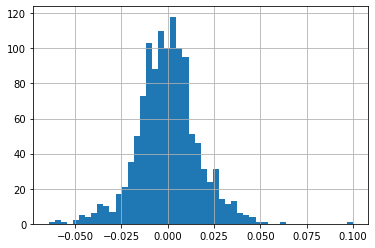

In [22]:
Mit['Return'].hist(bins=50)

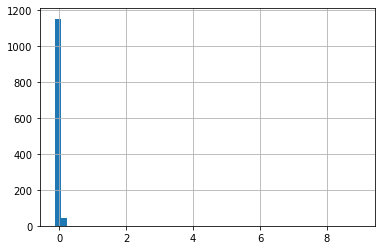

In [23]:
Sharp['Return'].hist(bins=50);

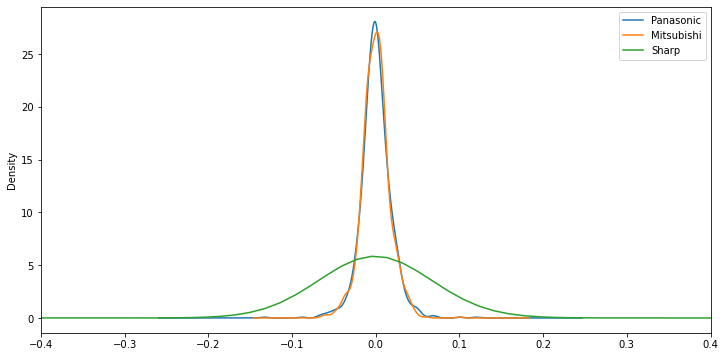

In [24]:
Pana['Return'].plot(kind='kde',label='Panasonic',figsize=(12,6), xlim=(-0.4,0.4))
Mit['Return'].plot(kind='kde',label='Mitsubishi')
Sharp['Return'].plot(kind='kde',label='Sharp')
plt.legend()

### Cumulative Return

In [25]:
Pana['Cumulative Return'] = (1 + Pana['Return']).cumprod()
Mit['Cumulative Return'] = (1 + Mit['Return']).cumprod()
Sharp['Cumulative Return'] = (1 + Sharp['Return']).cumprod()

C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Tram\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

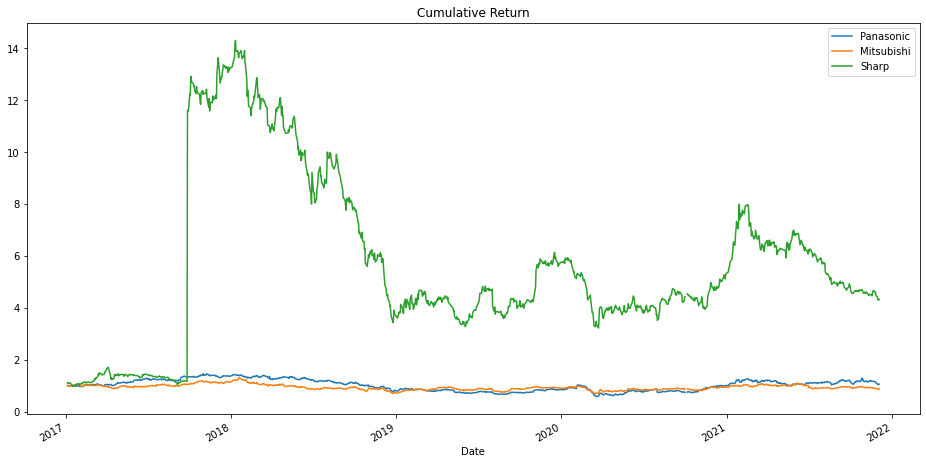

In [26]:
Pana['Cumulative Return'].plot(label='Panasonic', figsize=(16,8), title='Cumulative Return')
Mit['Cumulative Return'].plot(label='Mitsubishi')
Sharp['Cumulative Return'].plot(label='Sharp')
plt.legend()
plt.show()


## Creat a portfolio

Assume that our portfolio consists of these 3 stocks with weights of 50%,30%,20% for Panasonic, Mitsubishi and Sharp respectively. 

### Cumulative portfolio return

In [27]:
Portfolio_ret = 0.5*Pana['Cumulative Return'] + 0.3*Mit['Cumulative Return'] + 0.2*Sharp['Cumulative Return']
Portfolio_df =pd.DataFrame(Portfolio_ret)
Portfolio_df

,Cumulative Return
Date,
2017-01-04,NaN
2017-01-05,1.018790
2017-01-06,1.010787
2017-01-10,1.006158
2017-01-11,1.010403
...,...
2021-11-29,1.682161
2021-11-30,1.643116
2021-12-01,1.641794


### Daily portfolio return

In [28]:
#Daily portfolio return:
Portfolio_df['Daily Return'] = Portfolio_df['Cumulative Return'].pct_change(1)
Portfolio_df

,Cumulative Return,Daily Return
Date,,
2017-01-04,NaN,NaN
2017-01-05,1.018790,NaN
2017-01-06,1.010787,-0.007855
2017-01-10,1.006158,-0.004579
2017-01-11,1.010403,0.004219
...,...,...
2021-11-29,1.682161,-0.017090
2021-11-30,1.643116,-0.023211
2021-12-01,1.641794,-0.000805


### Avg daily return

In [29]:
Portfolio_df['Daily Return'].mean()

0.0012047544263870927

### Daily Standard Deviation

In [30]:
Portfolio_df['Daily Return'].std()

0.05387107866348794

### Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since the Japan 10-Year Government Bond in 2021 is almost 0 %, based on which we can refer the risk-free rate to. 
For the purpose of this project, we will calculate the daily sharpe ratio.

https://ycharts.com/indicators/japan_10year_government_bond_interest_rate

### Sharpe ratio

In [31]:
SharpeR = Portfolio_df['Daily Return'].mean()/Portfolio_df['Daily Return'].std()
SharpeR

0.022363658873673822

In [32]:
Annualized_SharpeR=(252**0.5)*SharpeR
Annualized_SharpeR

0.3550120787113427

## Portfolio optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

In [33]:
Stocks_com = pd.concat([Pana['Close'], Mit['Close'],Sharp['Close']], axis =1)
Stocks_com.columns = ['Pana', 'Mit', 'Sharp']

In [34]:
Stocks_com

,Pana,Mit,Sharp
Date,,,
2017-01-04,1217.0,1664.5,293.0
2017-01-05,1219.0,1643.0,325.0
2017-01-06,1212.5,1647.5,316.0
2017-01-10,1197.5,1629.5,323.0
2017-01-11,1211.5,1632.5,320.0
...,...,...,...
2021-11-29,1273.0,1453.0,1301.0
2021-11-30,1242.5,1424.5,1270.0
2021-12-01,1244.0,1432.5,1265.0


In [35]:
mean_daily_ret = Stocks_com.pct_change(1).mean()
mean_daily_ret

Pana     0.000193
Mit      0.000018
Sharp    0.007143
dtype: float64

In [36]:
Stocks_com.pct_change(1).corr()

,Pana,Mit,Sharp
Pana,1.000000,0.583658,0.060311
Mit,0.583658,1.000000,0.042871
Sharp,0.060311,0.042871,1.000000


Panasonic and Mitsubishi stocks have a moderataly strong positive correlation, meanwhile sharp has weak correlation with the other two.

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

In [37]:
log_ret = np.log(Stocks_com/Stocks_com.shift(1))
log_ret.head()

,Pana,Mit,Sharp
Date,,,
2017-01-04,NaN,NaN,NaN
2017-01-05,0.001642,-0.013001,0.103653
2017-01-06,-0.005347,0.002735,-0.028083
2017-01-10,-0.012448,-0.010986,0.021910
2017-01-11,0.011623,0.001839,-0.009331


In [38]:
num_ports = 15000 #Assume there are 15000 portfolio combinations of security allocation.

all_weights = np.zeros((num_ports,len(Stocks_com.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(3))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [39]:
sharpe_arr.max()

0.2699176443505356

In [46]:
sharpe_arr.argmax()

8965

In [47]:
sharpe_arr[8965]

0.2699176443505356

In [42]:
all_weights[8965,:]

array([0.28523255, 0.51455152, 0.20021593])

In [48]:
max_sr_ret = ret_arr[8965]
max_sr_vol = vol_arr[8965]
print(str(max_sr_ret))
print(str(max_sr_vol))

0.2843549645202926
1.0534878711041489


### Plotting the data

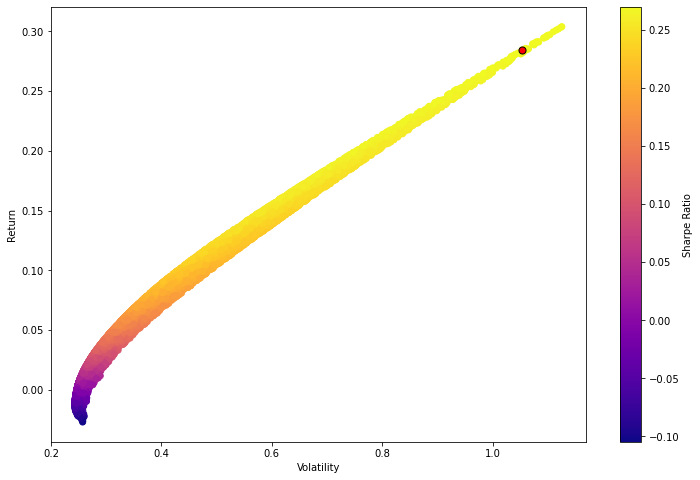

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');